# Breast Histopathology Image Classification Project using SVM Model

Context:

Breast cancer is one of the most common form of cancer in women, and IDC is the most common form of breast cancer.

The dataset consists of 162 whole mount slide images of Breast Cancer specimens scanned at 40x. Each image in the dataset is named in the format of uxXyYclassC.png where u is the patient ID, x is the x-coordinate of where that patch was cropped from, likewise y for y-coordinate, and C indicates the class where 0 means non-IDC and 1 means is IDC. IDC stand for Invasive Ductal Carcinoma which is most common subtype of all breast cancers. 

Original files: http://gleason.case.edu/webdata/jpi-dl-tutorial/IDC_regular_ps50_idx5.zip

But downloaded from kaggle.

So the main goal of this project is to classify the given image to predict whether it is IDC or non-IDC.

In first go, I will be applying SVM model for Machine Learning.

Before going right into the coding section, first let's look about SVM quickly. 

## Support Vector Machine (SVM)

SVM is one of the most popular machine learning algorithm mainly used for classification problems. The fundamental working principle of SVM is based on increasing the margin between classes/clusters by the hyperplane. 

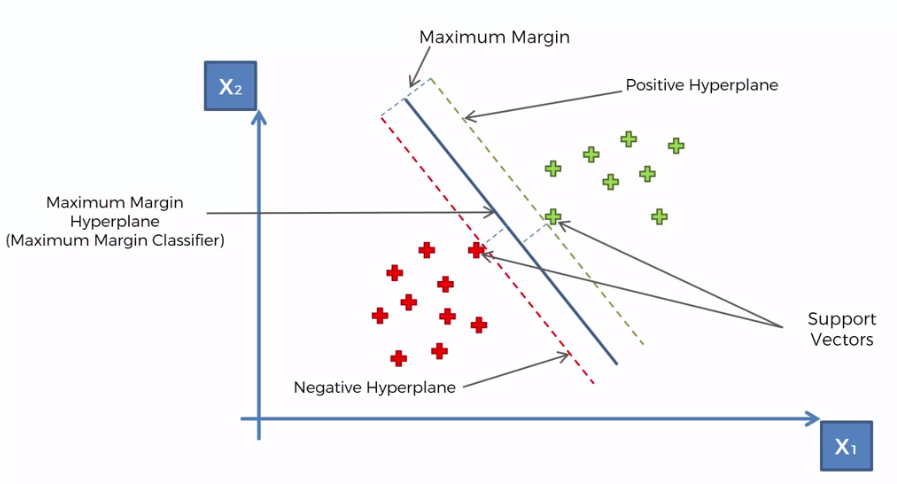


Image source: https://1.bp.blogspot.com/-K8qVBF8FKpk/WVnU0CDKPzI/AAAAAAAABy4/X-otWS8WuickSKOu0JNEjergkePulalZQCLcBGAs/s1600/Capture.PNG

In [2]:
import os 
import pickle
import numpy as np
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

print('Libraries importing finished!')

Libraries importing finished!


In [3]:
dir = '/home/kishor/PycharmProjects/archive'

files = os.listdir(dir)

14209
/home/kishor/PycharmProjects/archive/14209
1
14209_idx5_x1051_y1501_class1.png
[[142 112 158 ... 238 239 239]
 [157 138 126 ... 237 240 238]
 [165 164 164 ... 200 236 238]
 ...
 [153 121 147 ... 152 169 146]
 [172 158 150 ... 128 126 172]
 [163 168 152 ... 104 156 180]]


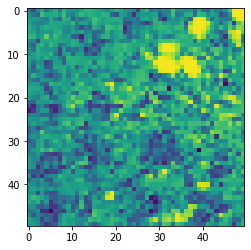

In [4]:
for file in files:
    print (file)
    path = dir + '/'+str (file)
    print (path)
    folders = os.listdir(path)
    
    for folder in folders:
        print(folder)
        img_path = path+'/'+str(folder)
        images = os.listdir(img_path) 
        
        for img in images:
            print (img)
            complete_path = img_path+'/'+str(img)
            foto = cv2.imread(complete_path, 0)
            print(foto)
            plt.imshow(foto)
            plt.show()
            
            break
        break
    break 
    
            
        

So were able to get image from archive folder located in my pc. Next, we will build our dataset by merging all images with their label as '0' or '1'

In [6]:
features = []
labels = []

for file in files:
    path = dir + '/'+str (file)
    folders = os.listdir(path)
    
    for folder in folders:
        img_path = path+'/'+str(folder)
        images = os.listdir(img_path) 
        
        for img in images:
            complete_path = img_path+'/'+str(img)
            foto = cv2.imread(complete_path, 0)
            try:
                foto= cv2.resize(foto, (40, 40)) # since, images are in different size so resizing in necessary
                image = np.array(foto).flatten() 
                features.append(foto)
                labels.append(int(folder))
            except Exception as e:
                pass


In [7]:
feature_data = open('features.pickle', 'wb')
pickle.dump(features, feature_data)

label_data = open('labels.pickle', 'wb')
pickle.dump(labels, label_data)

In [9]:
print(labels[:2])

[1, 1]


In [10]:
pick_in = open('features.pickle', 'rb')
features = pickle.load(pick_in)

pick_in = open('labels.pickle', 'rb')
labels = pickle.load(pick_in)

In [11]:
len(features)

277524

In [12]:
len(labels)

277524

In [13]:
labels[0]

features[0]

array([[140, 130, 168, ..., 205, 239, 239],
       [158, 145, 162, ..., 179, 233, 238],
       [167, 157, 150, ..., 158, 183, 222],
       ...,
       [142, 141, 127, ..., 183, 171, 166],
       [162, 146, 130, ..., 161, 140, 160],
       [164, 161, 133, ..., 140, 135, 176]], dtype=uint8)

Let's randomly shuffle data.

In [14]:
random.shuffle(features)
random.shuffle(labels)

In [15]:
np.array(features).shape

(277524, 40, 40)

In [24]:
features[0]

array([184, 216, 221, ..., 133,  97,  77], dtype=uint8)

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.25)

In [33]:
len(xtrain)

208143

In [34]:
len(xtest)

69381

In [ ]:
model = SVC(gamma = 'auto', kernel = 'poly')
model.fit(xtrain, ytrain)

In [ ]:
modelSVM = open('modelSVM.pickle', 'wb')
pickle.dump(model, modelSVM)